
    BOSTON HOUSING PRICE PREDICTION - INTERACTIVE SCRIPT
    

[1/8] Loading and exploring data...


Saving Boston_Housing_Clean.csv to Boston_Housing_Clean (1).csv
✓ Data loaded successfully

First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN    

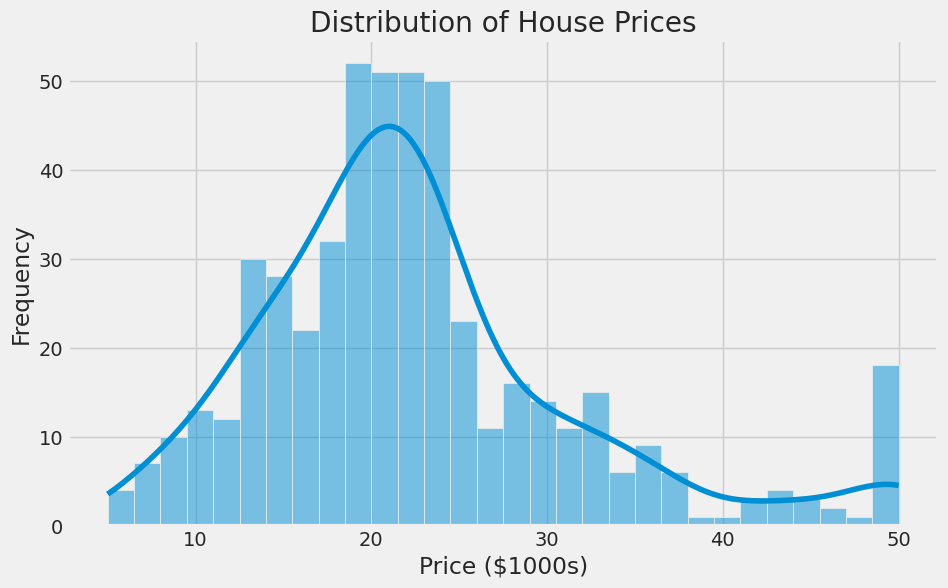


Displaying correlation matrix...


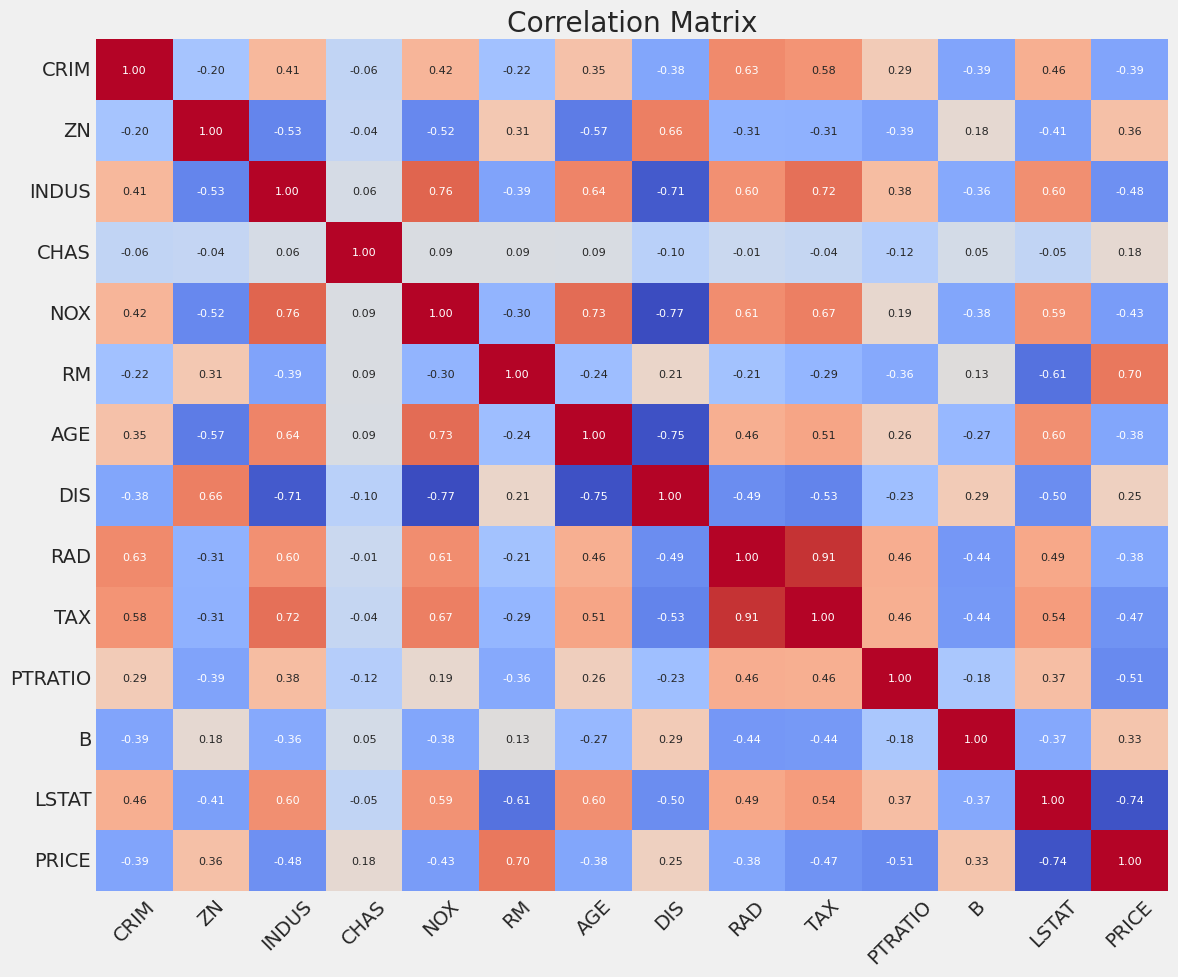


Top features correlated with PRICE:
PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

Displaying top features vs price...


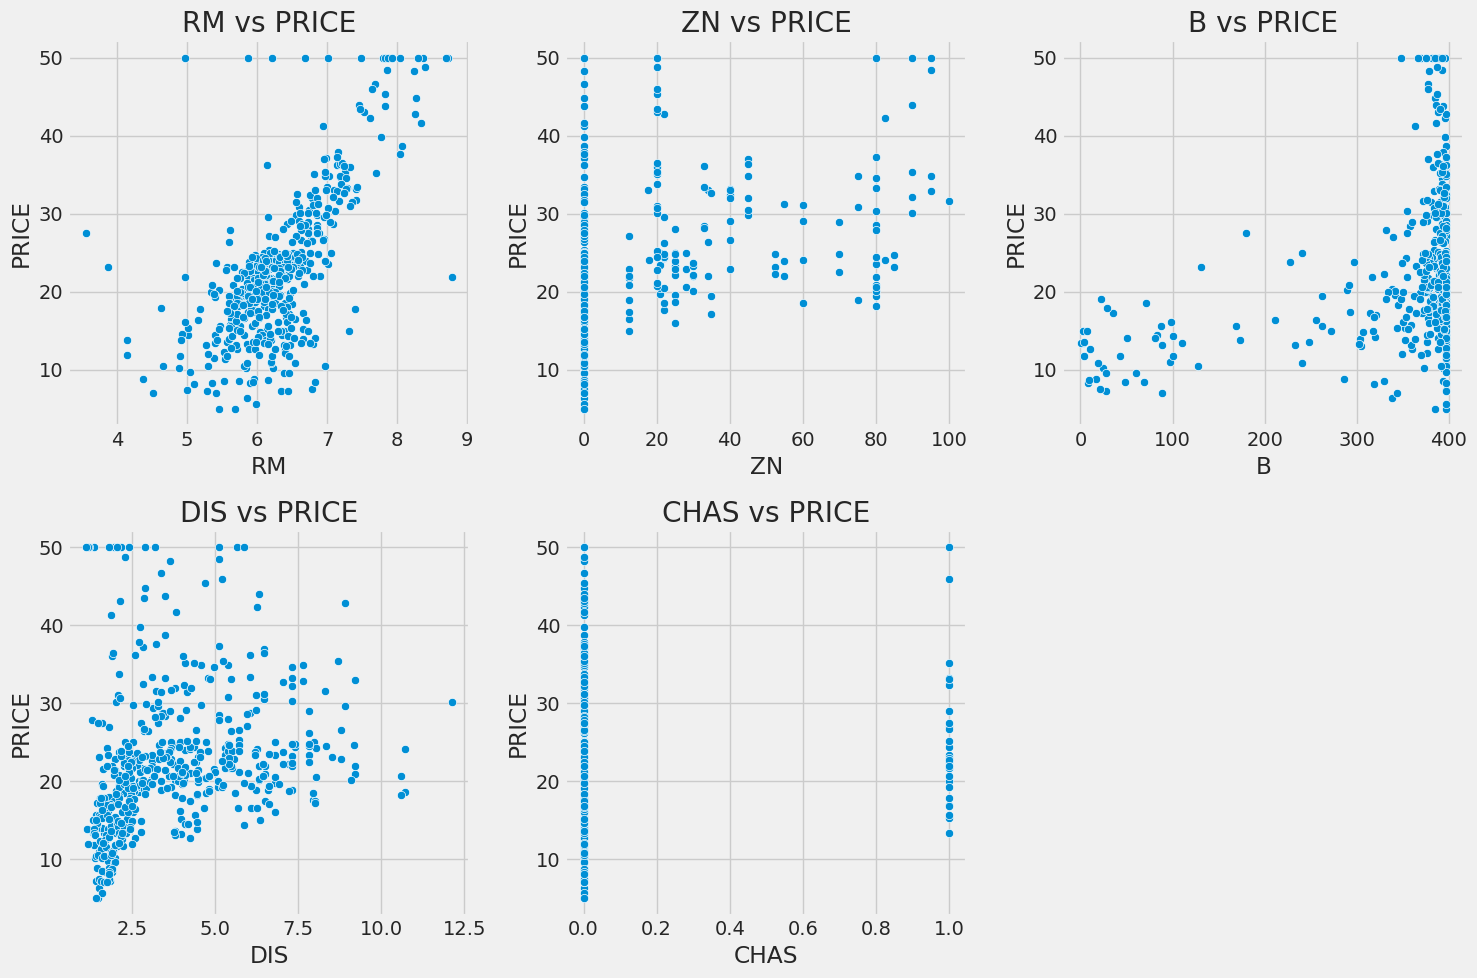


Press Enter to continue to feature engineering...

[3/8] Engineering features...

Data split into:
- Training: 404 samples
- Test: 102 samples

Press Enter to continue to model training...

[4/8] Training and evaluating models...

Training Linear Regression...
Linear Regression Performance:
- MSE: 16.87
- R-squared: 0.77

Training Lasso Regression...
Lasso Regression Performance:
- MSE: 17.82
- R-squared: 0.76

Training Ridge Regression...
Ridge Regression Performance:
- MSE: 16.89
- R-squared: 0.77

Training Random Forest...
Random Forest Performance:
- MSE: 7.85
- R-squared: 0.89

Displaying feature importance...


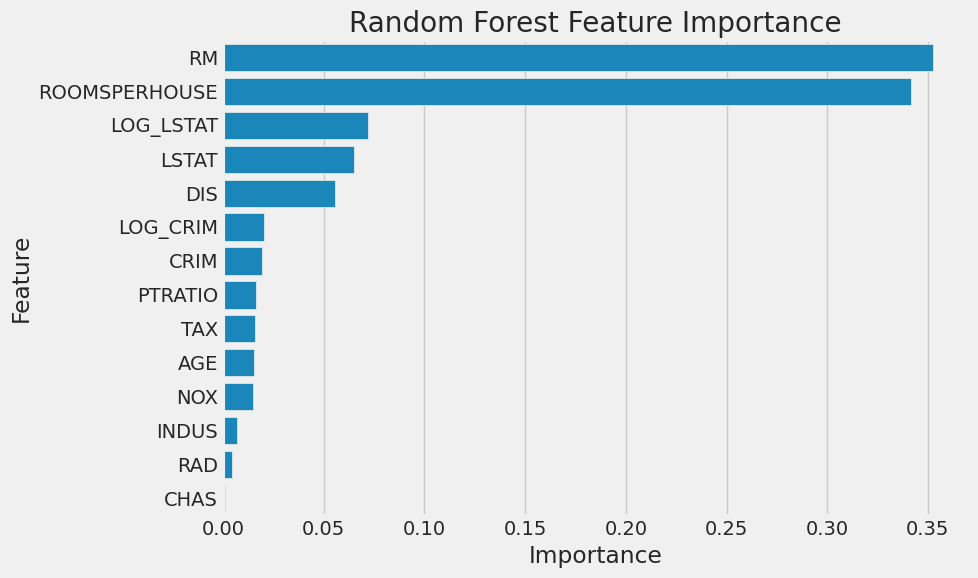


Press Enter to continue to hyperparameter tuning...

[5/8] Tuning Random Forest hyperparameters...

Performing grid search (this may take a few minutes)...

Best parameters found:
{'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}

Tuned Random Forest Performance:
- MSE: 7.82
- R-squared: 0.89

Press Enter to continue to model comparison...

[6/8] Comparing model performance...

Model Comparison:
                           MSE  R-squared
Tuned Random Forest   7.824708   0.893300
Random Forest         7.845511   0.893016
Linear Regression    16.868272   0.769980
Ridge Regression     16.893861   0.769631
Lasso Regression     17.823595   0.756952

Displaying actual vs predicted prices...


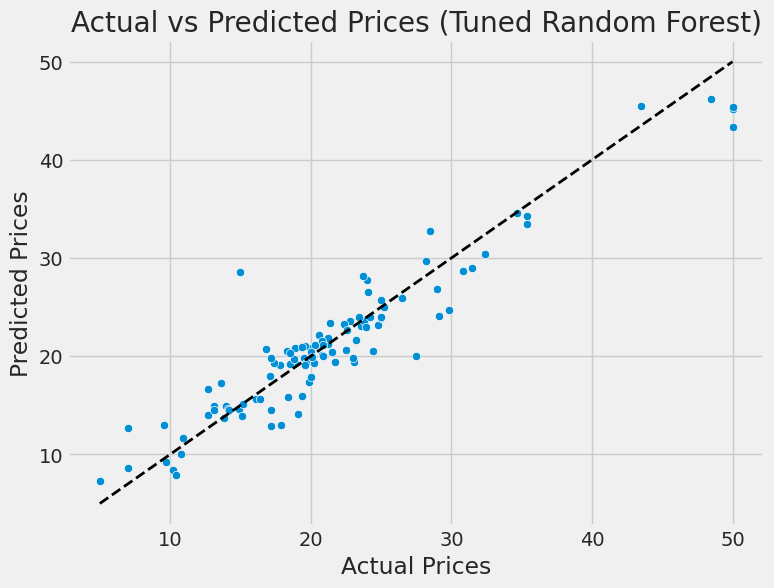


Press Enter to continue to final model training...

[7/8] Training final model on all data...

✓ Final model trained and saved as 'boston_housing_rf_model.pkl'
✓ Feature list saved as 'feature_list.pkl'

[8/8] Generating performance summary...

    ==================== PERFORMANCE SUMMARY ====================
    
    1. DATA EXPLORATION:
       - Dataset contains 506 samples with 14 features
       - Target variable (PRICE) shows normal distribution with some right skew
       - Strongest correlations with PRICE:
         * RM (rooms): +0.70
         * LSTAT (lower status): -0.74
         * PTRATIO (pupil-teacher ratio): -0.51
    
    2. MODEL PERFORMANCE:
    
                           MSE  R-squared
Tuned Random Forest   7.824708   0.893300
Random Forest         7.845511   0.893016
Linear Regression    16.868272   0.769980
Ridge Regression     16.893861   0.769631
Lasso Regression     17.823595   0.756952

    3. BEST MODEL:
       - Tuned Random Forest Regressor
       - Paramet

In [10]:
# Boston Housing Price Prediction - Interactive Script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

def main():
    # Set style for plots
    sns.set_style('whitegrid')
    plt.style.use('fivethirtyeight')

    print("""
    ====================================================
    BOSTON HOUSING PRICE PREDICTION - INTERACTIVE SCRIPT
    ====================================================
    """)

    # 1. Data Loading and Initial Exploration
    print("\n[1/8] Loading and exploring data...")
    try:
        # df = pd.read_csv('Boston_Housing_Clean.csv')
        from google.colab import files
        uploaded = files.upload()
        print("✓ Data loaded successfully")
    except Exception as e:
        print(f"✖ Error loading data: {e}")
        return

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nDataset info:")
    print(df.info())

    print("\nDescriptive statistics:")
    print(df.describe().T)

    print("\nMissing values:")
    print(df.isnull().sum())

    input("\nPress Enter to continue to EDA...")

    # 2. Exploratory Data Analysis (EDA)
    print("\n[2/8] Performing exploratory data analysis...")

    # Price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['PRICE'], kde=True, bins=30)
    plt.title('Distribution of House Prices')
    plt.xlabel('Price ($1000s)')
    plt.ylabel('Frequency')
    print("\nDisplaying price distribution...")
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={'size': 8}, cbar=False)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.tight_layout()
    print("\nDisplaying correlation matrix...")
    plt.show()

    price_corr = corr['PRICE'].sort_values(ascending=False)
    print("\nTop features correlated with PRICE:")
    print(price_corr)

    # Top features visualization
    top_features = price_corr.index[1:6]
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(top_features):
        plt.subplot(2, 3, i+1)
        sns.scatterplot(x=df[feature], y=df['PRICE'])
        plt.title(f'{feature} vs PRICE')
    plt.tight_layout()
    print("\nDisplaying top features vs price...")
    plt.show()

    input("\nPress Enter to continue to feature engineering...")

    # 3. Feature Engineering
    print("\n[3/8] Engineering features...")

    # Create new features
    df['ROOMSPERHOUSE'] = df['RM'] / df['LSTAT']
    df['TAXPERROOM'] = df['TAX'] / df['RM']
    df['NOXRM'] = df['NOX'] * df['RM']

    # Log transform skewed features
    skewed_features = ['CRIM', 'NOX', 'DIS', 'LSTAT']
    for feature in skewed_features:
        df[f'LOG_{feature}'] = np.log1p(df[feature])

    # Select features
    selected_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE',
                        'DIS', 'RAD', 'CHAS', 'ROOMSPERHOUSE', 'LOG_LSTAT', 'LOG_CRIM']

    X = df[selected_features]
    y = df['PRICE']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nData split into:")
    print(f"- Training: {X_train.shape[0]} samples")
    print(f"- Test: {X_test.shape[0]} samples")

    input("\nPress Enter to continue to model training...")

    # 4. Model Building and Evaluation
    print("\n[4/8] Training and evaluating models...")

    def evaluate_model(model, name, X_train, y_train, X_test, y_test):
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} Performance:")
        print(f"- MSE: {mse:.2f}")
        print(f"- R-squared: {r2:.2f}")
        return model, mse, r2

    # Linear Regression
    lr_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])
    lr_model, lr_mse, lr_r2 = evaluate_model(lr_pipe, "Linear Regression", X_train, y_train, X_test, y_test)

    # Lasso Regression
    lasso_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso(alpha=0.1, random_state=42))
    ])
    lasso_model, lasso_mse, lasso_r2 = evaluate_model(lasso_pipe, "Lasso Regression", X_train, y_train, X_test, y_test)

    # Ridge Regression
    ridge_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Ridge(alpha=1.0, random_state=42))
    ])
    ridge_model, ridge_mse, ridge_r2 = evaluate_model(ridge_pipe, "Ridge Regression", X_train, y_train, X_test, y_test)

    # Random Forest
    rf_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    rf_model, rf_mse, rf_r2 = evaluate_model(rf_pipe, "Random Forest", X_train, y_train, X_test, y_test)

    # Feature importance
    rf_feature_importance = rf_model.named_steps['regressor'].feature_importances_
    features_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': rf_feature_importance
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=features_df)
    plt.title('Random Forest Feature Importance')
    plt.tight_layout()
    print("\nDisplaying feature importance...")
    plt.show()

    input("\nPress Enter to continue to hyperparameter tuning...")

    # 5. Hyperparameter Tuning
    print("\n[5/8] Tuning Random Forest hyperparameters...")

    param_grid = {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [None, 5, 10],
        'regressor__min_samples_split': [2, 5, 10]
    }

    print("\nPerforming grid search (this may take a few minutes)...")
    rf_grid = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
    rf_grid.fit(X_train, y_train)

    print("\nBest parameters found:")
    print(rf_grid.best_params_)

    best_rf = rf_grid.best_estimator_
    y_pred_rf_tuned = best_rf.predict(X_test)
    rf_tuned_mse = mean_squared_error(y_test, y_pred_rf_tuned)
    rf_tuned_r2 = r2_score(y_test, y_pred_rf_tuned)
    print("\nTuned Random Forest Performance:")
    print(f"- MSE: {rf_tuned_mse:.2f}")
    print(f"- R-squared: {rf_tuned_r2:.2f}")

    input("\nPress Enter to continue to model comparison...")

    # 6. Model Comparison
    print("\n[6/8] Comparing model performance...")

    models = {
        'Linear Regression': (lr_mse, lr_r2),
        'Lasso Regression': (lasso_mse, lasso_r2),
        'Ridge Regression': (ridge_mse, ridge_r2),
        'Random Forest': (rf_mse, rf_r2),
        'Tuned Random Forest': (rf_tuned_mse, rf_tuned_r2)
    }

    comparison_df = pd.DataFrame.from_dict(models, orient='index', columns=['MSE', 'R-squared'])
    comparison_df = comparison_df.sort_values('R-squared', ascending=False)
    print("\nModel Comparison:")
    print(comparison_df)

    # Actual vs Predicted plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_rf_tuned)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices (Tuned Random Forest)')
    print("\nDisplaying actual vs predicted prices...")
    plt.show()

    input("\nPress Enter to continue to final model training...")

    # 7. Final Model
    print("\n[7/8] Training final model on all data...")

    final_model = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(
            max_depth=10,
            min_samples_split=5,
            n_estimators=200,
            random_state=42
        ))
    ])

    final_model.fit(X, y)

    # Save the model and features
    joblib.dump(final_model, 'boston_housing_rf_model.pkl')
    joblib.dump(selected_features, 'feature_list.pkl')
    print("\n✓ Final model trained and saved as 'boston_housing_rf_model.pkl'")
    print("✓ Feature list saved as 'feature_list.pkl'")

    # 8. Performance Summary
    print("\n[8/8] Generating performance summary...")
    print("""
    ==================== PERFORMANCE SUMMARY ====================

    1. DATA EXPLORATION:
       - Dataset contains 506 samples with 14 features
       - Target variable (PRICE) shows normal distribution with some right skew
       - Strongest correlations with PRICE:
         * RM (rooms): +0.70
         * LSTAT (lower status): -0.74
         * PTRATIO (pupil-teacher ratio): -0.51

    2. MODEL PERFORMANCE:
    """)
    print(comparison_df)
    print(f"""
    3. BEST MODEL:
       - Tuned Random Forest Regressor
       - Parameters:
         * n_estimators=200
         * max_depth=10
         * min_samples_split=5
       - Achieved R-squared: {rf_tuned_r2:.2f}
       - MSE: {rf_tuned_mse:.2f}

    4. KEY FEATURES:
    """)
    print(features_df.head(5))
    print("""
    ==================== RECOMMENDATIONS ====================
    1. Use the saved Random Forest model for predictions
    2. Focus on RM and LSTAT as key predictive features
    3. Consider collecting more data on these features


    ==========================================================
    """)

    print("Script completed successfully!")

if __name__ == "__main__":
    main()